In [1]:
%matplotlib inline


# Filter Out Background Noise


Use soundpy to filter out background noise from audio signals. 

To see how soundpy implements this, see `soundpy.builtin.filtersignal`.



In [2]:
# to be able to import soundpy from parent directory:
import os
package_dir = '../'
os.chdir(package_dir)

Let's import soundpy, assuming it is in your working directory:



In [3]:
import soundpy as sp;
import IPython.display as ipd

### soundpy offers an example audio file. Let's use it and add some white background noise.



Speech sample:



In [4]:
# Use function 'string2pathlib' to turn string path into pathlib object 
# This allows flexibility across operating systems
speech = sp.string2pathlib('audiodata/python.wav')

## Hear and see the speech 

In [5]:
# set feature_type for visualization: 'stft' (same as 'powspec'), 'fbank', 'mfcc'
feature_type = 'stft'
# For filtering, we will set the sample rate to be quite high:
sr = 48000
s, sr = sp.loadsound(speech, sr=sr)
ipd.Audio(s,rate=sr)

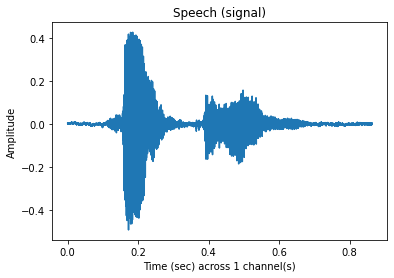

In [6]:
sp.plotsound(s, sr=sr, feature_type='signal', title='Speech (signal)')

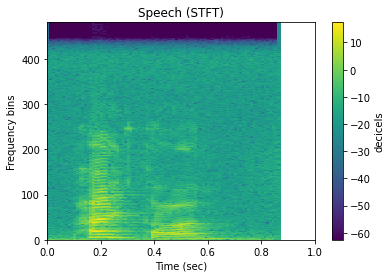

In [7]:
sp.plotsound(s, sr=sr, feature_type=feature_type, title='Speech ({})'.format(feature_type.upper()))

## Add noise: 10 SNR 

Go ahead and play with different SNR levels and see how the filtering handles it.

In [21]:
snr = 20

In [22]:
s_snr = sp.augment.add_white_noise(s, sr=sr, snr=snr)

/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/soundpy/dsp.py:640: UserWarning: 

  warnings.warn(msg)


In [23]:
ipd.Audio(s_snr,rate=sr)

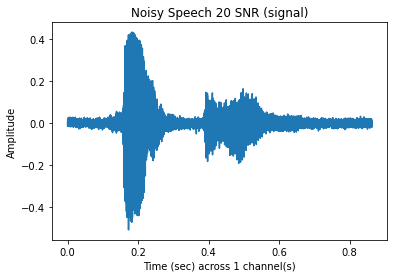

In [24]:
sp.plotsound(s_snr, sr=sr, feature_type='signal', title='Noisy Speech {} SNR (signal)'.format(snr))

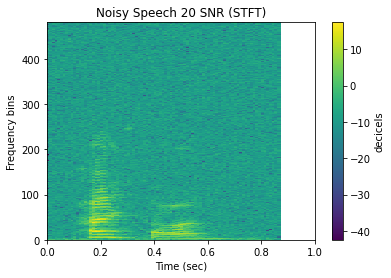

In [25]:
sp.plotsound(s_snr, sr=sr, feature_type=feature_type, title='Noisy Speech {} SNR ({})'.format(snr, feature_type.upper()))

## Wiener Filter 

In [36]:
wf_snr, sr = sp.filtersignal(s_snr,
                               sr=sr,
                               filter_type='wiener', # default filter
                               filter_scale=2, # default = 1
                               duration_noise_ms = 120, # amount of time at beg of signal for noise reference
                               )

In [37]:
ipd.Audio(wf_snr,rate=sr)

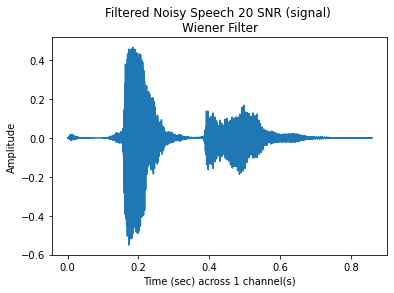

In [28]:
sp.plotsound(wf_snr, sr=sr, feature_type='signal', 
               title='Filtered Noisy Speech {} SNR (signal) \nWiener Filter'.format(snr))

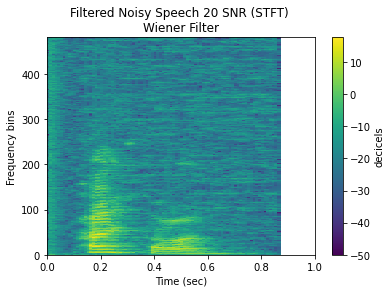

In [38]:
sp.plotsound(wf_snr, sr=sr, feature_type=feature_type, 
               title='Filtered Noisy Speech {} SNR ({}) \nWiener Filter'.format(snr, feature_type.upper()))

## Wiener Filter with Postfilter

In this case, **the post filter doesn't improve the signal** (rather makes it worse). But if you have a filtered signal that has a lot of 'musical noise' or artifacts resulting from filtering, this postfilter should reduce those artifacts. 

In [45]:
wf_snr_pf, sr = sp.filtersignal(s_snr,
                                   sr=sr,
                                   filter_type='wiener',
                                   filter_scale=2,
                                   duration_noise_ms = 120,
                                   apply_postfilter = True)

In [46]:
ipd.Audio(wf_snr_pf,rate=sr)

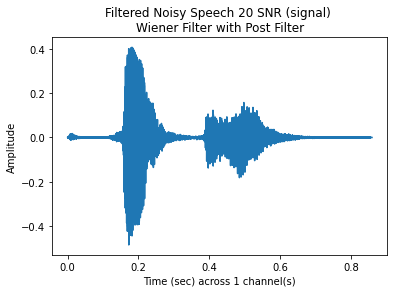

In [47]:
sp.plotsound(wf_snr_pf, sr=sr, feature_type='signal', 
               title='Filtered Noisy Speech {} SNR (signal) \nWiener Filter with Post Filter'.format(snr))

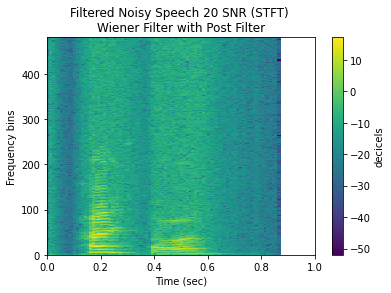

In [48]:
sp.plotsound(wf_snr_pf, sr=sr, feature_type=feature_type, 
               title='Filtered Noisy Speech {} SNR ({}) \nWiener Filter with Post Filter'.format(snr, feature_type.upper()))